In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Load trends
df = pd.read_csv('../data/trends.csv', parse_dates=['Timestamp'])
df = df[df['Topic'] != -1]
top_trends = pd.read_csv('../data/trend_top.csv')
topic_ids = top_trends['TopicID']
df = df[df['Topic'].isin(topic_ids)]

In [34]:
topic_ids

0    77
1    94
2    20
3    21
4    61
Name: TopicID, dtype: int64

In [35]:
top_trends

,Unnamed: 0,TopicID,Label,Score,Keywords
0,0,77,Eye cream,15.203893,eye eye cream txa tranexamic acid tranexamic
1,1,94,Essentials,5.494520,dream essentials milk garnier protection
2,2,20,Skincare Routine,4.503023,skincareroutine skincare skincareroutine skinc...
3,3,21,Glowy skin,3.920001,perfect skin pov love pov skincare byoma
4,4,61,Cleanser,3.392150,clean cleanser step stripping gentle


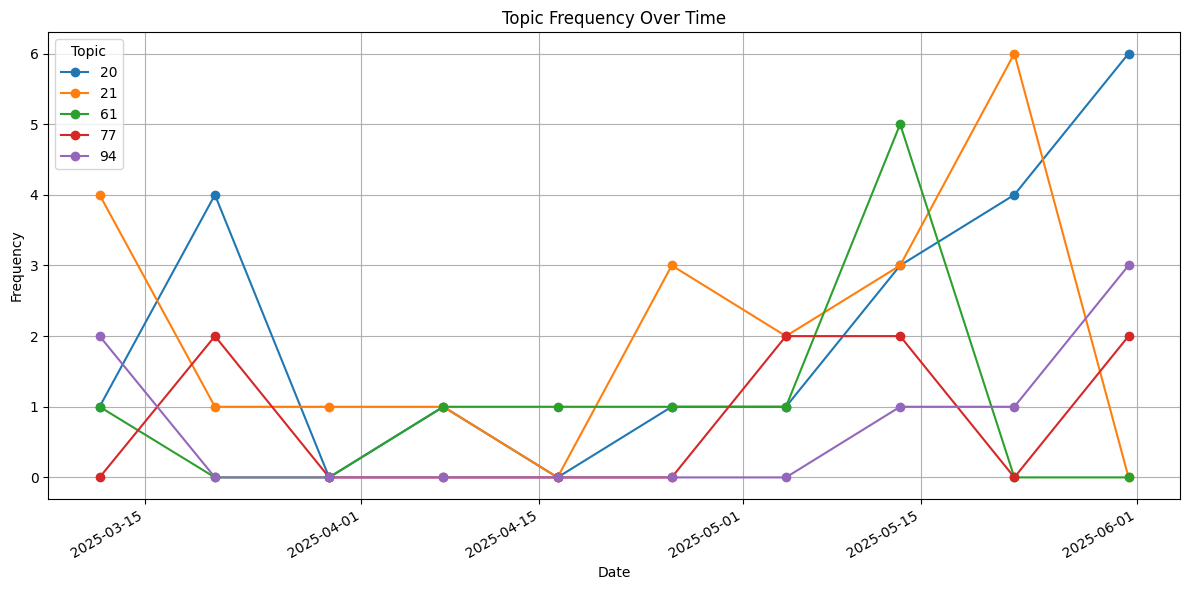

In [36]:
# 1) Group by Timestamp & Topic to aggregate Frequency
grouped = (
    df
    .groupby(['Timestamp', 'Topic'])['Frequency']
    .sum()
    .reset_index()
)

# 2) Pivot so each Topic is a column
pivot = grouped.pivot(index='Timestamp', columns='Topic', values='Frequency').fillna(0)

# 3) Plot
pivot.plot(figsize=(12, 6), marker='o')
plt.title('Topic Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.legend(title='Topic')
plt.grid(True)
plt.tight_layout()
plt.show()
